<h3>Case Study 1</h3>

<h4>Robin Duhan
18BCS6150
    </h4>
    
<b>Build a multivariate Ordinary Least Squares regression model to predict "TARGET_deathRate"</b>

<h4> Importing Libraries and Observing our data </h4>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("D://CaseStudy/cancer_reg.csv", encoding='latin-1')
#Latin encoding

In [2]:
#To look at the first 5 rows
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
#For the shape
data.shape

(3047, 34)

In [4]:
#Looking more on the details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

So there are two categorical variables in our dataset.

In [5]:
data.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


<b> To check the null values and handling them </b>

In [6]:
data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [7]:
# Dropping this column because it has more than 50% null values
data.drop(["PctSomeCol18_24"], axis = 1, inplace = True)

In [8]:
# For columns with less null values, filling/replacing them with mean values
data.fillna(data.mean(), inplace = True)

In [9]:
#Checking after filling them with mean
data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [10]:
#Looking at the object type columns

#First one
data["binnedInc"].head()

0     (61494.5, 125635]
1    (48021.6, 51046.4]
2    (48021.6, 51046.4]
3      (42724.4, 45201]
4    (48021.6, 51046.4]
Name: binnedInc, dtype: object

In [11]:
#Second one
data["Geography"].head()

0       Kitsap County, Washington
1     Kittitas County, Washington
2    Klickitat County, Washington
3        Lewis County, Washington
4      Lincoln County, Washington
Name: Geography, dtype: object

In [12]:
#It seems like we can split it and have some good data in the column
# Removing string before the comma, using a non pandas apprach

data["Geography"] = [d.split(',')[1] for d in data['Geography']]

In [13]:
#Checking if we removed it successfully. 

data["Geography"].head()

0     Washington
1     Washington
2     Washington
3     Washington
4     Washington
Name: Geography, dtype: object

In [14]:
#Unique entries

print("Unique states: " + str(data["Geography"].unique().size))
print("Unique entries in binnedInc column: " + str(data["binnedInc"].unique().size))

Unique states: 51
Unique entries in binnedInc column: 10


<b> Now we have two choices, either to include the two categorical columns in our analysis or not
    The Geography Column has 51 unique values so we won't be considering that
    But we would incoperate the binnedInc column in one of our models
    so we would we creating two models, one with the binnedInc, one without it
    </b>

<h2> Visualising </h2>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:xlabel='binnedInc', ylabel='TARGET_deathRate'>

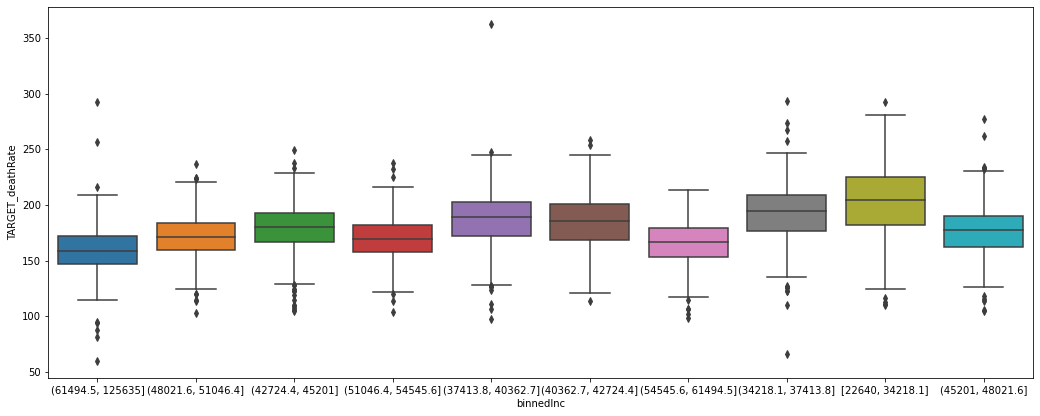

In [16]:
#Visualising the categorical columns with respect to our final output varible

plt.figure(figsize=(60, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'binnedInc', y = 'TARGET_deathRate', data = data)

<AxesSubplot:xlabel='Geography', ylabel='TARGET_deathRate'>

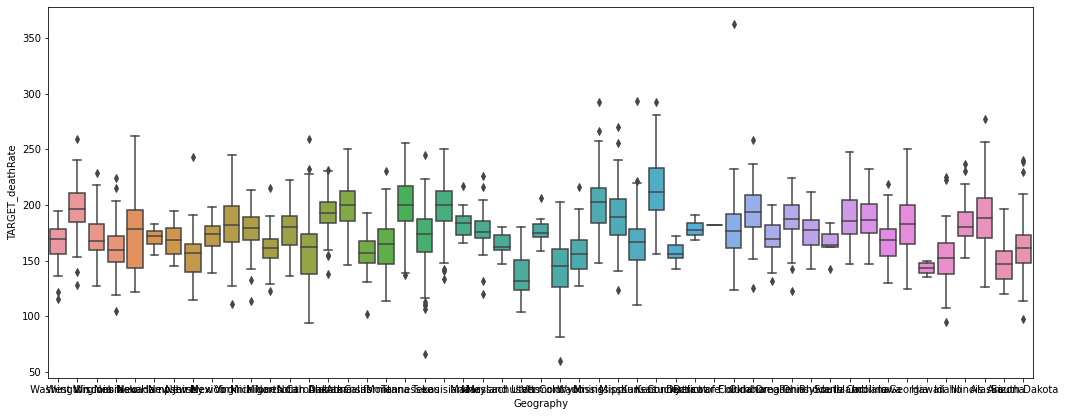

In [17]:
plt.figure(figsize=(60, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'Geography', y = 'TARGET_deathRate', data = data)

In [18]:
#Still dropping the Geography Column

#data.drop(["binnedInc"], axis = 1, inplace = True)
data.drop(["Geography"], axis = 1, inplace = True)

In [19]:
data1 = data.copy()

<b> The model Without binnedInc column </b>

In [20]:
#Hence dropping it
data.drop(["binnedInc"], axis = 1, inplace = True)

#Total Features
NetFeatures = data.columns

In [21]:
NetFeatures.shape

(31,)

In [22]:
NetF = NetFeatures

In [23]:
dat = pd.read_csv("D://CaseStudy/cancer_reg.csv", encoding='latin-1')
#Two temperary lists/arrays for our use
temp1=[]
temp2=[]

#Fiding Features whose skewness can be decreases
skewFeature=[]

for i in NetF:
    temp1.append(dat[i].skew())
    if (dat[i].min()) > 0 :
        dat[i] = dat[i].map(lambda s: np.log(s)if s > 0 else 0)
    #To check     
    if (dat[i].min()) <= 0 :
        dat[i] = dat[i].map(lambda s: -np.power(-s, 1./3) if s < 0 else np.power(s, 1./3)) 
        
    temp2.append(dat[i].skew())
for n in range(31):
    if abs(temp1[n])>abs(temp2[n]):
        skewFeature.append(NetF[n])
print(skewFeature)

['avgAnnCount', 'avgDeathsPerYear', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'PctNoHS18_24', 'PctBachDeg18_24', 'PctBachDeg25_Over', 'PctBlack', 'PctAsian', 'PctOtherRace', 'BirthRate']


In [24]:
#Transforming our data based on skewnes

for i in skewFeature:
    if (data[i].min()) > 0 :
        data[i] = data[i].map(lambda k: np.log(k)if k > 0 else 0)
    #Checking
    if (data[i].min()) <= 0 :
        data[i] = data[i].map(lambda x: -np.power(-x, 1./3) if x < 0 else np.power(x, 1./3)) 
        
    print(i,"\t\t",data[i].skew())

avgAnnCount 		 0.33438336834896837
avgDeathsPerYear 		 0.405486726217226
medIncome 		 0.4184849321249866
popEst2015 		 0.49988172828815336
povertyPercent 		 -0.21737837178157263
studyPerCap 		 1.5546463151174357
MedianAge 		 6.768047263197833
PctNoHS18_24 		 -0.39893848747989075
PctBachDeg18_24 		 -1.0153896845918788
PctBachDeg25_Over 		 -0.06645748452840874
PctBlack 		 0.7926596190536284
PctAsian 		 0.9042406020756809
PctOtherRace 		 0.7756127136003952
BirthRate 		 -0.8156540915428376


In [25]:
#thing about outliers is that its best to remove them or else they mess things up

Ps = data.quantile(0.25)
Ps1 = data.quantile(0.75)
result = Ps1 - Ps

#Showing results
print(result)

data = data[~((data < (Ps - 2 * result)) |(data > (Ps1 + 2 * result))).any(axis=1)]
data.shape

avgAnnCount                 1.919242
avgDeathsPerYear            1.671742
TARGET_deathRate           34.000000
incidenceRate              60.550000
medIncome                   0.300117
popEst2015                  1.771108
povertyPercent              0.518214
studyPerCap                 4.373440
MedianAge                   0.154530
MedianAgeMale               6.150000
MedianAgeFemale             6.200000
AvgHouseholdSize            0.260000
PercentMarried              8.650000
PctNoHS18_24                0.492234
PctHS18_24                 11.500000
PctBachDeg18_24             0.558430
PctHS25_Over                9.250000
PctBachDeg25_Over           0.538110
PctEmployed16_Over         11.100000
PctUnemployed16_Over        4.200000
PctPrivateCoverage         14.900000
PctPrivateCoverageAlone    10.700000
PctEmpPrivCoverage         13.200000
PctPublicCoverage          10.650000
PctPublicCoverageAlone      8.250000
PctWhite                   18.155514
PctBlack                    1.337424
P

(2442, 31)

<b> Splitting the Data </b>

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

data_train, data_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 36)

Correlation 

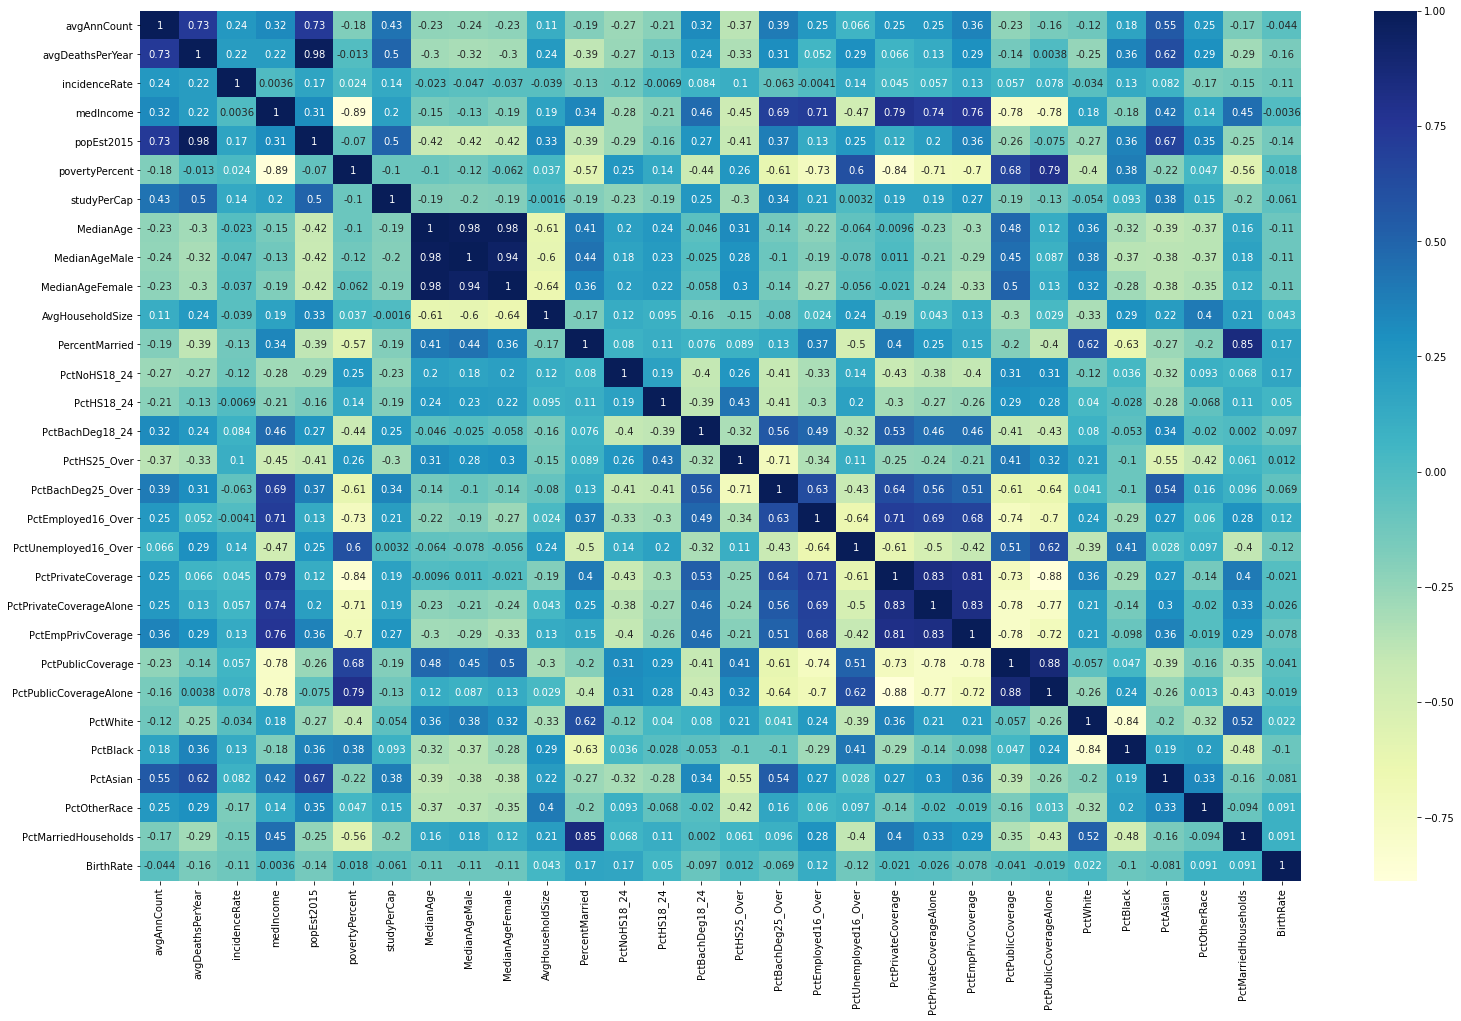

In [71]:
plt.figure(figsize = (26, 16))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [27]:
#Shapes
print(data_train.shape)
print(data_test.shape)

(1953, 31)
(489, 31)


<h4> Scaling the Data <h4>

In [28]:
#Rescalling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


data_train[NetF] = scaler.fit_transform(data_train[NetF])

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [29]:
data_train.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
979,0.405647,0.401529,0.541460,0.364017,0.557420,0.417487,0.421225,0.000000,0.606943,0.523132,...,0.646586,0.639066,0.398649,0.280236,0.396678,0.830553,0.396594,0.357338,0.446299,0.526855
4,0.279700,0.277536,0.287748,0.139470,0.523184,0.281908,0.436380,0.000000,0.795881,0.754448,...,0.395582,0.331210,0.686937,0.501475,0.902050,0.167461,0.452512,0.308975,0.560162,0.630164
1777,0.768278,0.758856,0.469059,0.529986,0.564046,0.777678,0.574145,0.586515,0.389650,0.309609,...,0.606426,0.541401,0.344595,0.274336,0.442780,0.793144,0.576645,0.358055,0.210934,0.429298
1353,0.783803,0.174762,0.369431,0.500172,0.380536,0.141952,0.472242,0.000000,0.866208,0.843416,...,0.514056,0.248408,0.576577,0.286136,0.959753,0.195182,0.281580,0.147440,0.620873,0.767409
1340,0.783803,0.195980,0.347772,0.500172,0.399861,0.175202,0.443776,0.000000,0.871917,0.832740,...,0.550201,0.477707,0.527027,0.286136,0.962874,0.136289,0.432813,0.000000,0.420707,0.694844


In [30]:
data_train1 = data_train.copy()

In [31]:
y_train = data_train.pop('TARGET_deathRate')
X_train = data_train

In [32]:
X_train.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

<b> Building our First Model using all the features except the categorical ones </b>

In [33]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                      1.113206
avgAnnCount               -0.111126
avgDeathsPerYear           4.675154
incidenceRate              0.146930
medIncome                  0.111967
popEst2015                -4.852287
povertyPercent            -0.012030
studyPerCap               -0.031079
MedianAge                 -0.515345
MedianAgeMale              0.227655
MedianAgeFemale           -0.244589
AvgHouseholdSize          -0.020199
PercentMarried            -0.028367
PctNoHS18_24               0.017960
PctHS18_24                 0.129215
PctBachDeg18_24            0.020922
PctHS25_Over              -0.115124
PctBachDeg25_Over         -0.179318
PctEmployed16_Over        -0.083322
PctUnemployed16_Over       0.112096
PctPrivateCoverage        -0.128310
PctPrivateCoverageAlone    0.019920
PctEmpPrivCoverage         0.074308
PctPublicCoverage         -0.502379
PctPublicCoverageAlone     0.338453
PctWhite                  -0.023232
PctBlack                   0.033481
PctAsian                  -0

In [34]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     259.7
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:47:37   Log-Likelihood:                 2491.9
No. Observations:                1953   AIC:                            -4922.
Df Residuals:                    1922   BIC:                            -4749.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Adjusted R square seems good!

<b> Using RFE to get the best features from our list of features </b>

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 24)             # running RFE
rfe = rfe.fit(X_train, y_train)

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=24 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Choosing best 24 columns because it gives the best result after iterative model building

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', True, 1),
 ('popEst2015', True, 1),
 ('povertyPercent', False, 6),
 ('studyPerCap', True, 1),
 ('MedianAge', True, 1),
 ('MedianAgeMale', True, 1),
 ('MedianAgeFemale', True, 1),
 ('AvgHouseholdSize', False, 4),
 ('PercentMarried', False, 3),
 ('PctNoHS18_24', False, 5),
 ('PctHS18_24', True, 1),
 ('PctBachDeg18_24', False, 2),
 ('PctHS25_Over', True, 1),
 ('PctBachDeg25_Over', True, 1),
 ('PctEmployed16_Over', True, 1),
 ('PctUnemployed16_Over', True, 1),
 ('PctPrivateCoverage', True, 1),
 ('PctPrivateCoverageAlone', True, 1),
 ('PctEmpPrivCoverage', True, 1),
 ('PctPublicCoverage', True, 1),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', True, 1),
 ('PctBlack', True, 1),
 ('PctAsian', False, 7),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', True, 1)]

In [38]:
#Columns selected through RFE
col = X_train.columns[rfe.support_]
col

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'studyPerCap', 'MedianAge', 'MedianAgeMale',
       'MedianAgeFemale', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [39]:
#Columns not selected by RFE

col1 = X_train.columns[~rfe.support_]
col1

Index(['povertyPercent', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
       'PctBachDeg18_24', 'PctAsian'],
      dtype='object')

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

<b> Building the Model again after choosing the best features </b>

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     324.8
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:47:38   Log-Likelihood:                 2489.9
No. Observations:                1953   AIC:                            -4930.
Df Residuals:                    1928   BIC:                            -4790.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Adjusted R square is optmized at 24 columns, so the extra columns are redundant.

In [42]:
#Prediction

y_train_price = lr_1.predict(X_train_lm)

The big assumption for Linear Regression is that error terms are normally distributed. Plotting the graph specifically to check that

Text(0.5, 0, 'Errors')

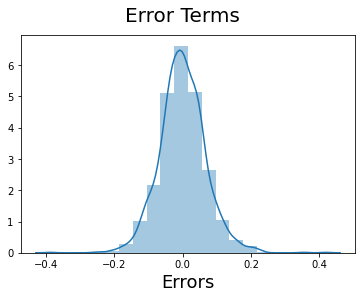

In [43]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

The error terms are normally distributed

<h2> Second Model with categorical Variable binnedInc </h2>

data1 is our original data with the null columns and geography column removed
Creating Dummy variable for binnedInc column

In [44]:
#Creating dummy variable for our categorical variable
binnedC = pd.get_dummies(data1['binnedInc'], drop_first = True)

# Check what the dataset 'status' looks like
binnedC.head()

,"(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [45]:
data_train1.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
979,0.405647,0.401529,0.541460,0.364017,0.557420,0.417487,0.421225,0.000000,0.606943,0.523132,...,0.646586,0.639066,0.398649,0.280236,0.396678,0.830553,0.396594,0.357338,0.446299,0.526855
4,0.279700,0.277536,0.287748,0.139470,0.523184,0.281908,0.436380,0.000000,0.795881,0.754448,...,0.395582,0.331210,0.686937,0.501475,0.902050,0.167461,0.452512,0.308975,0.560162,0.630164
1777,0.768278,0.758856,0.469059,0.529986,0.564046,0.777678,0.574145,0.586515,0.389650,0.309609,...,0.606426,0.541401,0.344595,0.274336,0.442780,0.793144,0.576645,0.358055,0.210934,0.429298
1353,0.783803,0.174762,0.369431,0.500172,0.380536,0.141952,0.472242,0.000000,0.866208,0.843416,...,0.514056,0.248408,0.576577,0.286136,0.959753,0.195182,0.281580,0.147440,0.620873,0.767409
1340,0.783803,0.195980,0.347772,0.500172,0.399861,0.175202,0.443776,0.000000,0.871917,0.832740,...,0.550201,0.477707,0.527027,0.286136,0.962874,0.136289,0.432813,0.000000,0.420707,0.694844


In [46]:
#Concatenating them together

data_train1 = pd.concat([data_train1, binnedC], axis = 1)

In [47]:
#Concatenating them together

data1 = pd.concat([data1, binnedC], axis = 1)

In [48]:
#Lets look at it

data_train1.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,BirthRate,"(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
0,0.735376,0.706414,0.414604,0.626569,0.683967,0.722630,0.385209,0.606418,0.496838,0.366548,...,0.567910,0,0,0,0,0,0,0,1,0
1,0.437845,0.424385,0.392327,0.353905,0.495223,0.477652,0.621573,0.217669,0.243462,0.199288,...,0.378109,0,0,0,0,1,0,0,0,0
2,0.362590,0.374495,0.475248,0.138075,0.514015,0.379090,0.508742,0.276866,0.693251,0.619217,...,0.302171,0,0,0,0,1,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,1,0,0,0,0,0,0
4,0.279700,0.277536,0.287748,0.139470,0.523184,0.281908,0.436380,0.000000,0.795881,0.754448,...,0.630164,0,0,0,0,1,0,0,0,0


In [49]:
data_train1.shape

(3047, 40)

In [50]:
#Removing NULl values, because they are in almost 1000 rows

data_train1.dropna(inplace = True)

In [51]:
data_train1.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
(37413.8, 40362.7]         0
(40362.7, 42724.4]         0
(42724.4, 45201]           0
(45201, 48021.

In [52]:
#Getting our x_train and y_train here

y_train = data_train1.pop('TARGET_deathRate')
X_train = data_train1

In [53]:
X_train.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', '(37413.8, 40362.7]',
       '(40362.7, 42724.4]', '(42724.4, 45201]', '(45201, 48021.6]',
       '(48021.6, 51046.4]', '(51046.4, 54545.6]', '(54545.6, 61494.5]',
       '(61494.5, 125635]', '[22640, 34218.1]'],
      dtype='object')

<b> Building the model </b>

In [54]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train_lm).fit()

lm.params

const                      1.035629
avgAnnCount               -0.104060
avgDeathsPerYear           4.701212
incidenceRate              0.146631
medIncome                  0.229479
popEst2015                -4.881609
povertyPercent             0.020630
studyPerCap               -0.027572
MedianAge                 -0.546747
MedianAgeMale              0.239039
MedianAgeFemale           -0.236621
AvgHouseholdSize          -0.019924
PercentMarried            -0.029125
PctNoHS18_24               0.020535
PctHS18_24                 0.126480
PctBachDeg18_24            0.012216
PctHS25_Over              -0.088078
PctBachDeg25_Over         -0.164636
PctEmployed16_Over        -0.066910
PctUnemployed16_Over       0.106634
PctPrivateCoverage        -0.101509
PctPrivateCoverageAlone    0.015659
PctEmpPrivCoverage         0.048522
PctPublicCoverage         -0.489188
PctPublicCoverageAlone     0.317879
PctWhite                  -0.008476
PctBlack                   0.035558
PctAsian                  -0

In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     207.2
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:47:38   Log-Likelihood:                 2524.1
No. Observations:                1953   AIC:                            -4968.
Df Residuals:                    1913   BIC:                            -4745.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

The adjusted R square is better than our previous model

<h4> Using RFE to optmize the feature selection </h4>

In [56]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 24)             # running RFE
rfe = rfe.fit(X_train, y_train)

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=24 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


It gives optmized values at 24 best features

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', True, 1),
 ('popEst2015', True, 1),
 ('povertyPercent', False, 2),
 ('studyPerCap', True, 1),
 ('MedianAge', True, 1),
 ('MedianAgeMale', True, 1),
 ('MedianAgeFemale', True, 1),
 ('AvgHouseholdSize', False, 5),
 ('PercentMarried', False, 4),
 ('PctNoHS18_24', False, 3),
 ('PctHS18_24', True, 1),
 ('PctBachDeg18_24', False, 13),
 ('PctHS25_Over', True, 1),
 ('PctBachDeg25_Over', True, 1),
 ('PctEmployed16_Over', True, 1),
 ('PctUnemployed16_Over', True, 1),
 ('PctPrivateCoverage', True, 1),
 ('PctPrivateCoverageAlone', False, 6),
 ('PctEmpPrivCoverage', True, 1),
 ('PctPublicCoverage', True, 1),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', False, 14),
 ('PctBlack', True, 1),
 ('PctAsian', False, 15),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', True, 1),
 ('(37413.8, 40362.7]', False, 16),
 ('(40362.7, 42724.4]', False, 12),
 ('(42724.4, 45201]

In [58]:
#Columns selected through RFE
col = X_train.columns[rfe.support_]
col

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'studyPerCap', 'MedianAge', 'MedianAgeMale',
       'MedianAgeFemale', 'PctHS18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctBlack', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       '(61494.5, 125635]', '[22640, 34218.1]'],
      dtype='object')

In [59]:
col1 = X_train.columns[~rfe.support_]
col1

Index(['povertyPercent', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24',
       'PctBachDeg18_24', 'PctPrivateCoverageAlone', 'PctWhite', 'PctAsian',
       '(37413.8, 40362.7]', '(40362.7, 42724.4]', '(42724.4, 45201]',
       '(45201, 48021.6]', '(48021.6, 51046.4]', '(51046.4, 54545.6]',
       '(54545.6, 61494.5]'],
      dtype='object')

In [60]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

<b> Building our model after RFE </b>

In [61]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     334.2
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:47:38   Log-Likelihood:                 2512.4
No. Observations:                1953   AIC:                            -4975.
Df Residuals:                    1928   BIC:                            -4835.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [72]:
#Prediction 

y_train_price = lm.predict(X_train_rfe)

<b> Checking the normal distribution </b>

Text(0.5, 0, 'Errors')

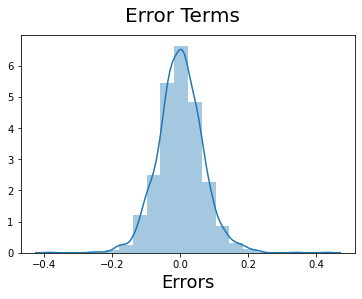

In [77]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

<h2> Model on Test data </h2>
<b> Using the first model for this </b>

In [64]:
data_test[NetF] = scaler.transform(data_test[NetF])

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [65]:
data_test.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.473773,0.439032,0.499827,0.489029,0.464686,0.447593,0.532569,0.165223,0.547983,0.465872,...,0.495283,0.482374,0.499153,0.386171,0.755988,0.416525,0.445288,0.390998,0.495613,0.495451
std,0.190736,0.183303,0.143755,0.159614,0.156507,0.181047,0.156643,0.246057,0.160611,0.162083,...,0.159934,0.183710,0.149895,0.154099,0.216126,0.228949,0.185272,0.187313,0.150362,0.156634
min,0.031785,0.000000,-0.021658,-0.034868,0.104192,0.007208,0.078574,0.000000,0.000000,0.000000,...,0.008032,-0.006369,0.126126,0.005900,0.022075,0.000000,0.000000,0.000000,0.009177,-0.000361
25%,0.343170,0.312886,0.404703,0.402022,0.367309,0.319938,0.421225,0.000000,0.444234,0.355872,...,0.409639,0.348195,0.387387,0.274336,0.663069,0.229194,0.345494,0.271415,0.400521,0.414749
50%,0.446625,0.422251,0.500619,0.500172,0.457790,0.425496,0.542590,0.000000,0.554709,0.459075,...,0.487024,0.486200,0.500000,0.371681,0.823108,0.366602,0.427054,0.373328,0.500244,0.492942
75%,0.593507,0.546029,0.584158,0.593096,0.560569,0.541691,0.636367,0.317160,0.650739,0.562278,...,0.594378,0.607219,0.599099,0.480826,0.923645,0.580299,0.544709,0.507430,0.597704,0.585417
max,1.021475,1.021497,0.995050,0.932008,0.936308,0.983690,0.924074,0.953429,1.000000,1.003559,...,0.965863,0.968153,1.002252,0.985251,0.992006,0.978129,1.000800,1.000215,0.972912,0.988810


In [66]:
y_test = data_test.pop('TARGET_deathRate')
X_test = data_test

In [67]:
X_test_new = sm.add_constant(X_test)

In [68]:
y_pred = lr_1.predict(X_test_new)

<h1> Model Evaluation </h1>

Text(0, 0.5, 'y_pred')

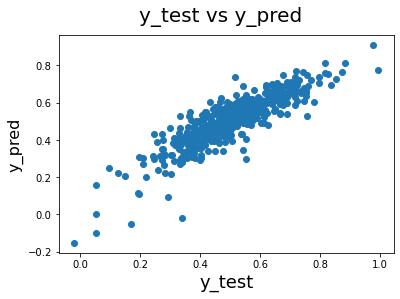

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 